In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


In [103]:
dataset = pd.read_csv("/content/CC GENERAL.csv")
df = pd.DataFrame(dataset)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [104]:
id_cols = [c for c in df.columns if 'id' in c.lower()]
df_numeric = df.drop(columns=id_cols, errors='ignore').select_dtypes(include=[np.number])

In [105]:
df_numeric = df_numeric.fillna(df_numeric.median())

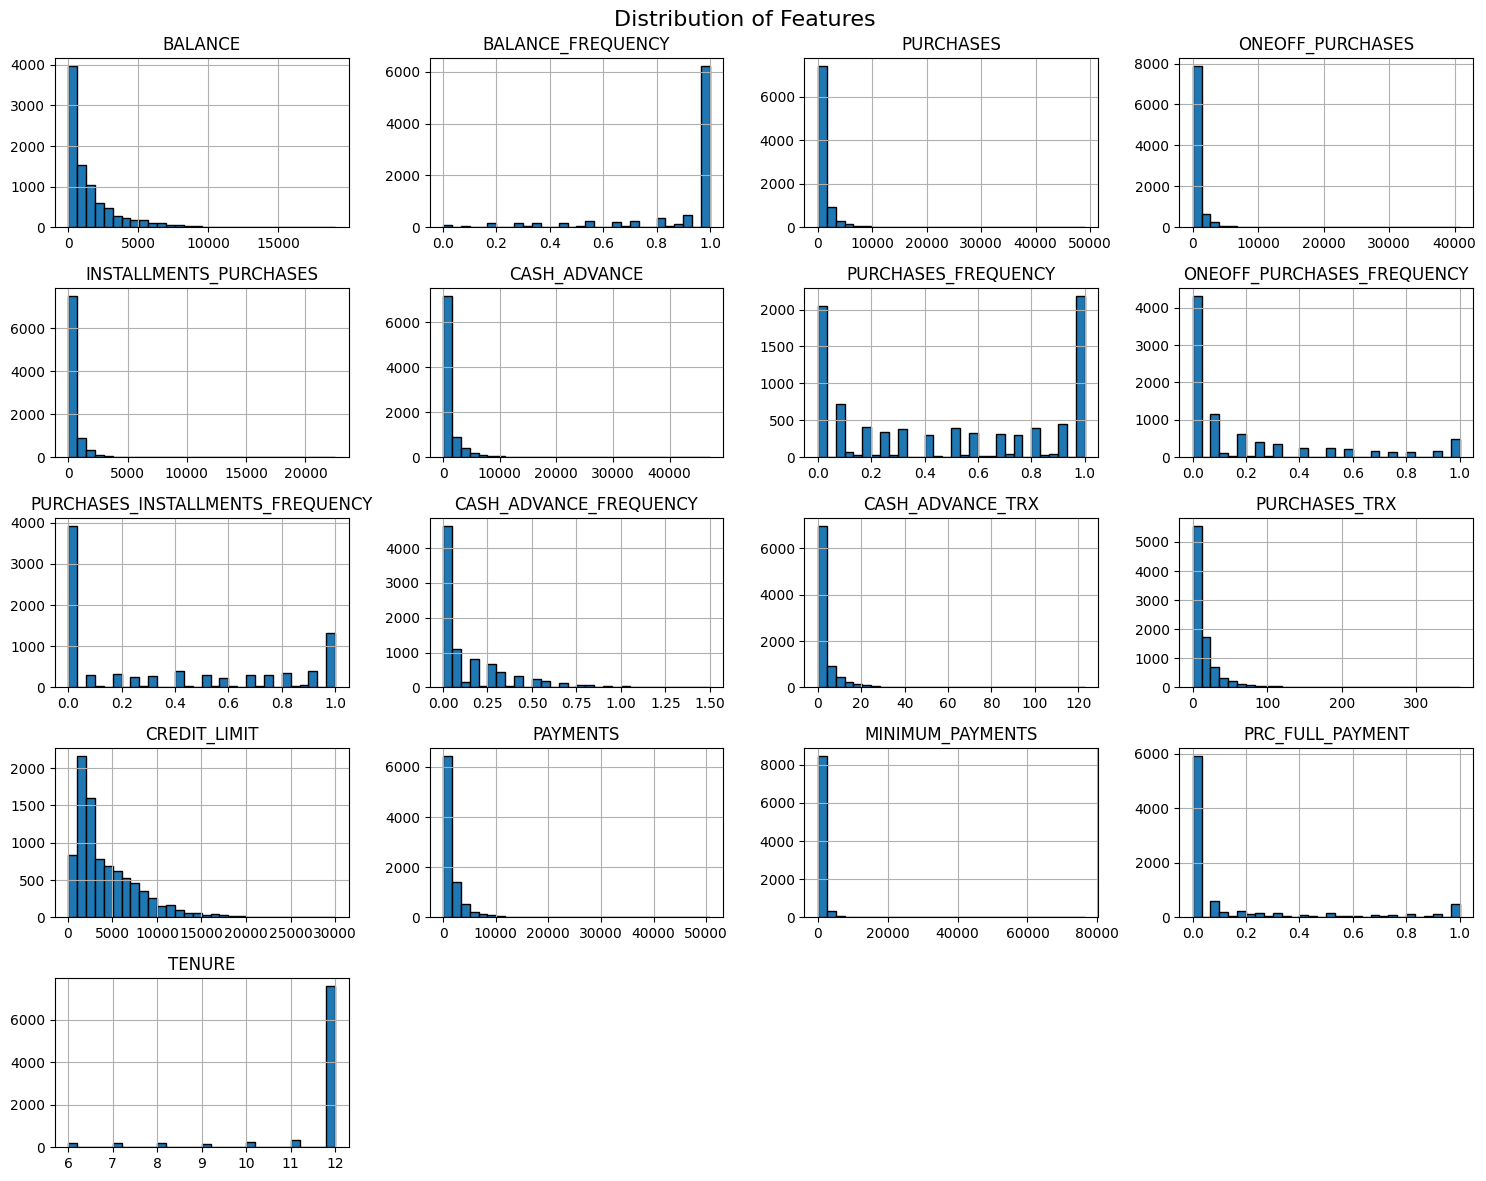

In [106]:
df_numeric.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle("Distribution of Features", fontsize=16)
plt.tight_layout()
plt.show()

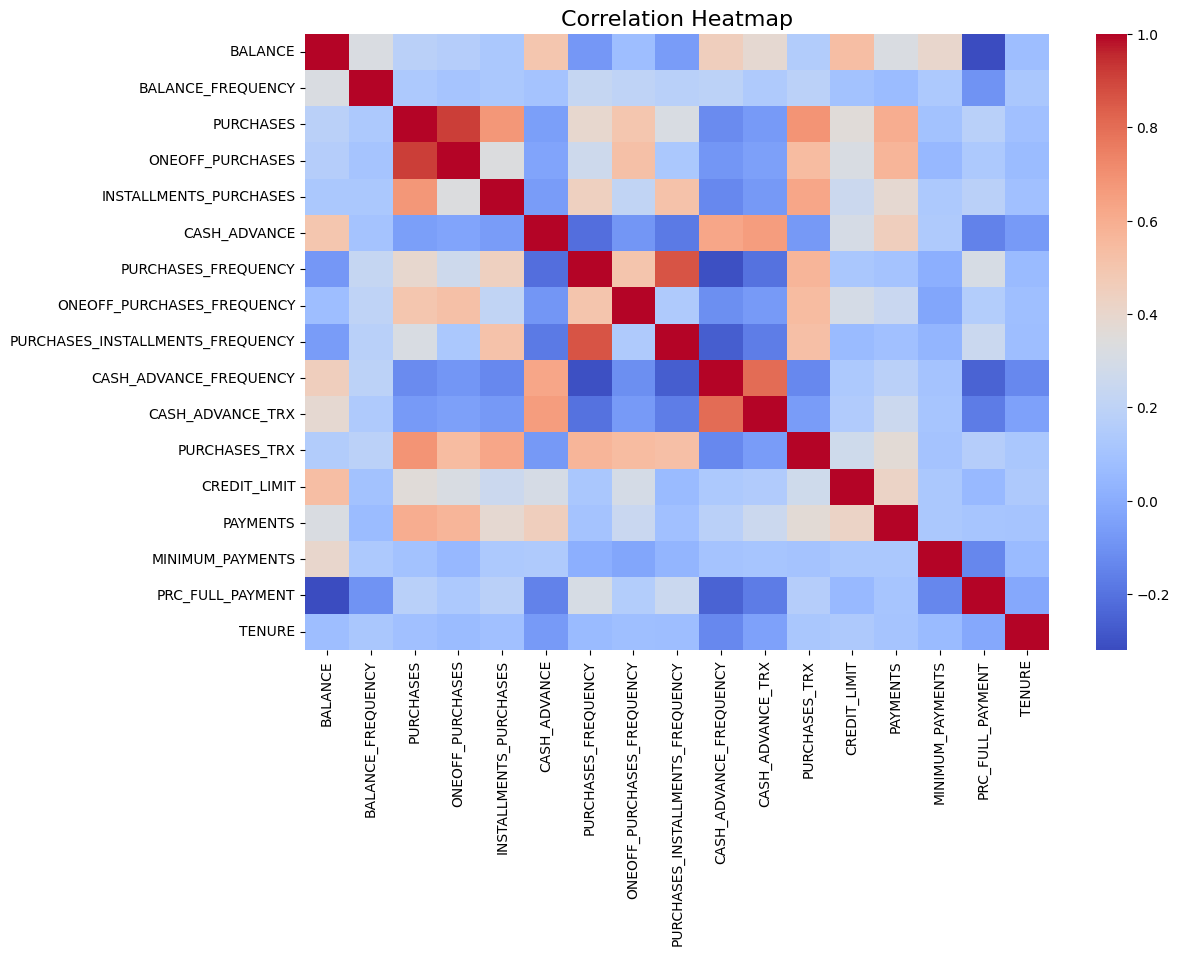

In [107]:
plt.figure(figsize=(12, 8))
corr = df_numeric.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

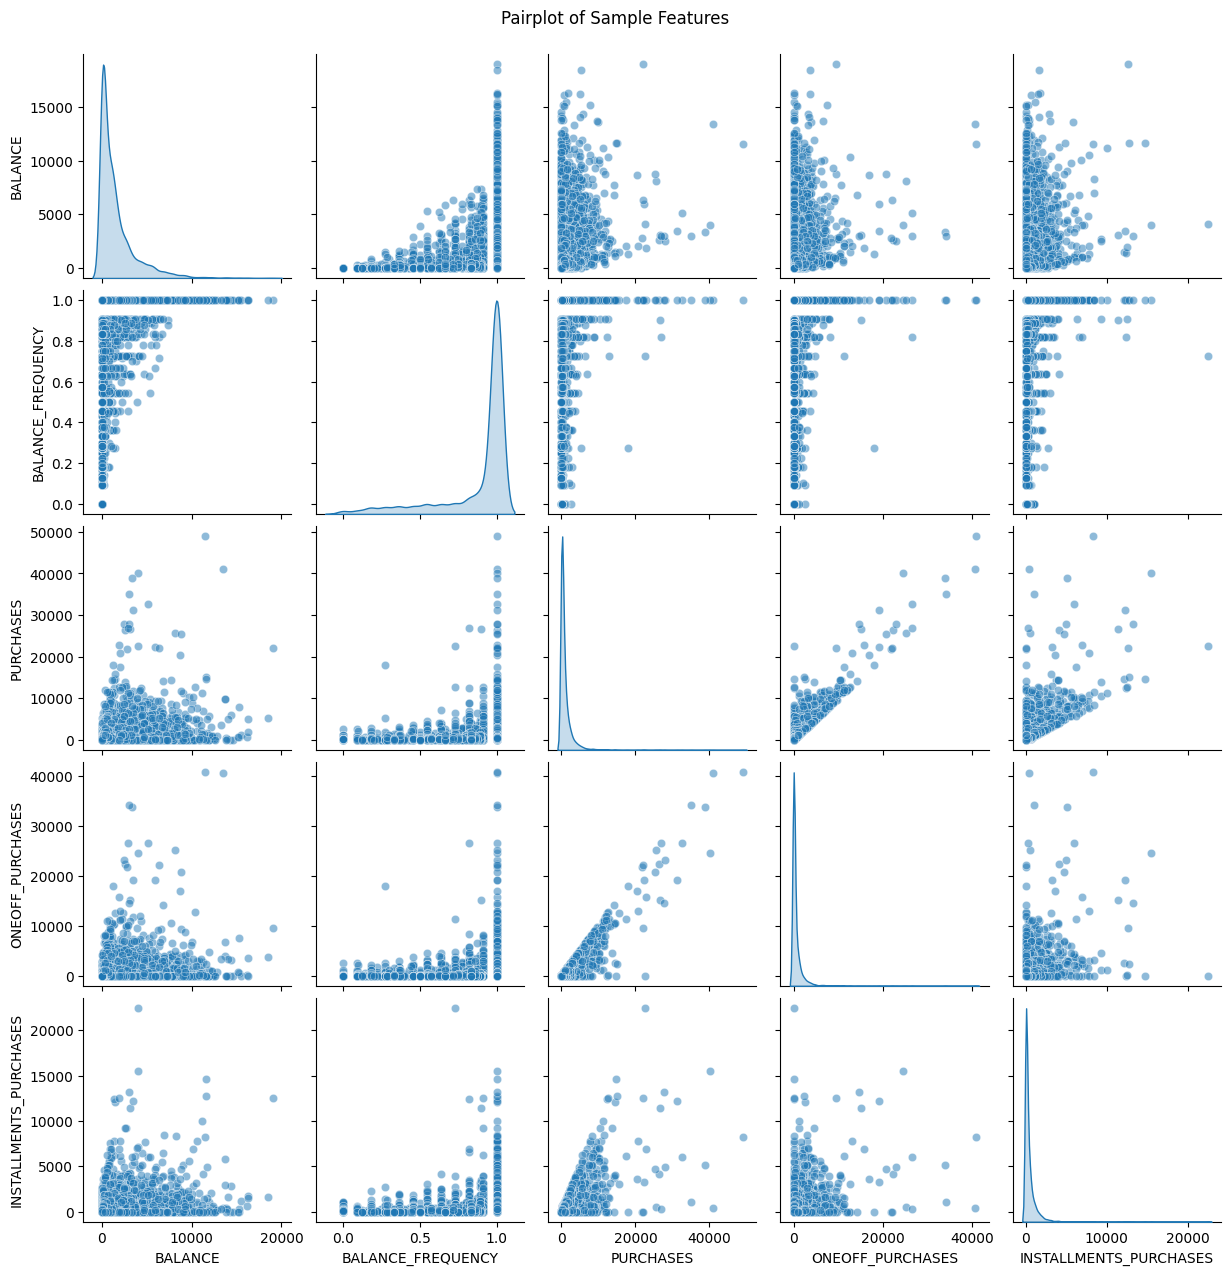

In [108]:
sample_cols = df_numeric.columns[:5]
sns.pairplot(df_numeric[sample_cols], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Sample Features", y=1.02)
plt.show()

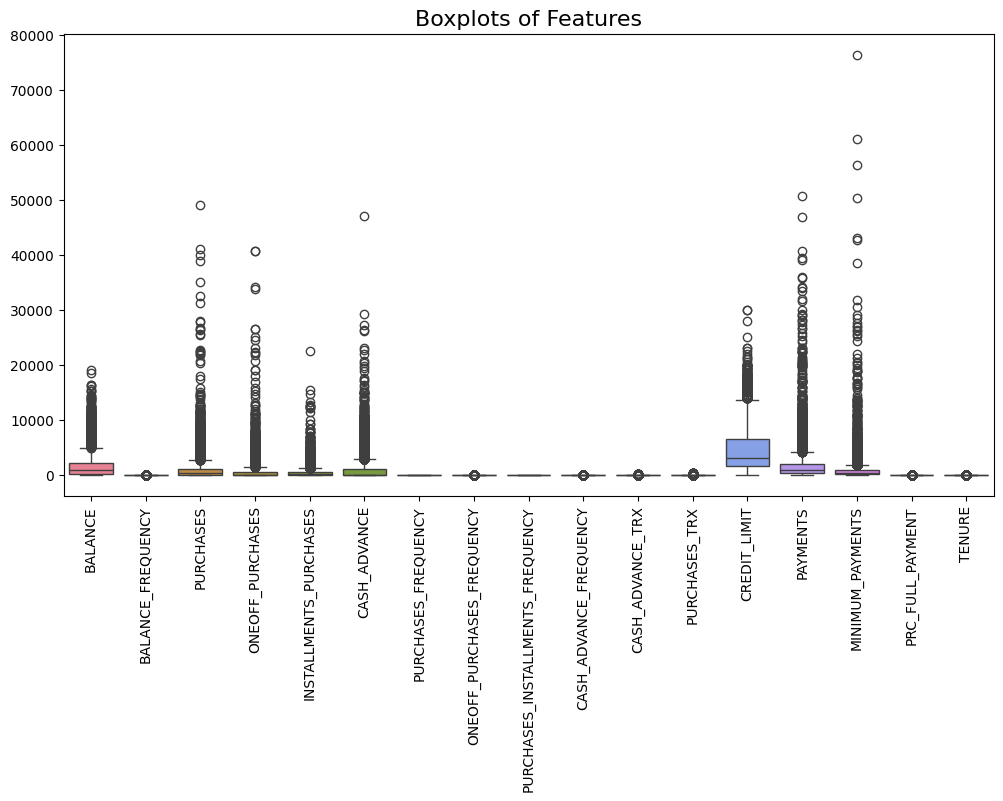

In [109]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title("Boxplots of Features", fontsize=16)
plt.show()

In [110]:
target_column = "CASH_ADVANCE"

y = df_numeric[target_column]
X = df_numeric.drop(columns=[target_column])

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [113]:
kmeans = KMeans(n_clusters=4, init='random', random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, labels_kmeans)

In [114]:
kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels_kmeans_plus = kmeans_plus.fit_predict(X_scaled)
score_kmeans_plus = silhouette_score(X_scaled, labels_kmeans_plus)

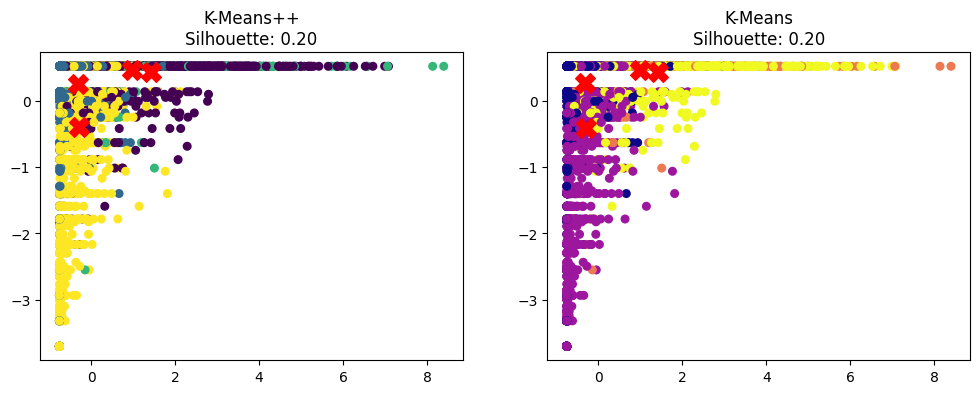

In [115]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# K-Means++
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans_plus, cmap='viridis', s=30)
axs[0].scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1],
               s=200, c='red', marker='X')
axs[0].set_title(f"K-Means++\nSilhouette: {score_kmeans_plus:.2f}")

# K-Means
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='plasma', s=30)
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               s=200, c='red', marker='X')
axs[1].set_title(f"K-Means\nSilhouette: {score_kmeans:.2f}")

plt.show()

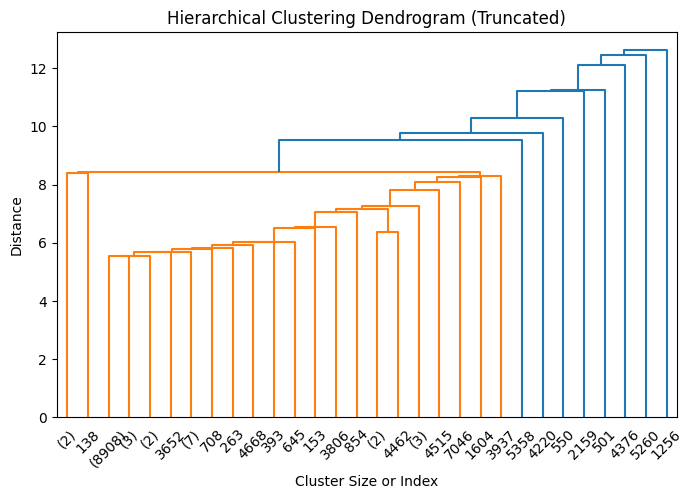

In [116]:
linked = linkage(X_scaled, method='single')  # Single linkage

plt.figure(figsize=(8, 5))
dendrogram(linked,
           truncate_mode='lastp',  # عرض آخر P كلاسستر
           p=30,                   # عرض آخر 30
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster Size or Index")
plt.ylabel("Distance")
plt.show()

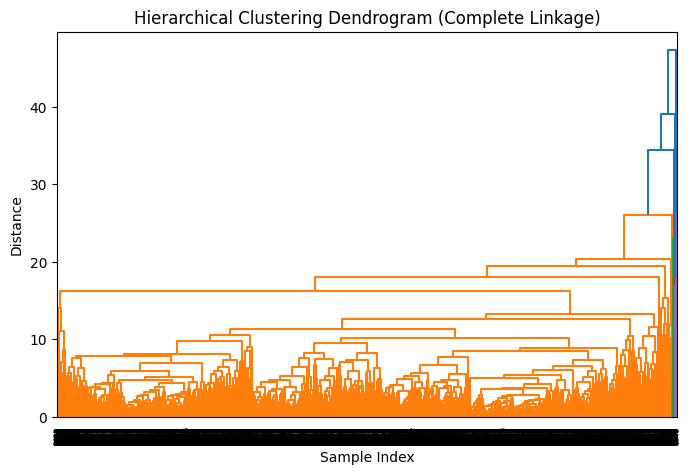

In [117]:
linked = linkage(X_scaled, method='complete')

plt.figure(figsize=(8,5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [118]:
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_agg = agg.fit_predict(X_scaled)

print(labels_agg)

[0 0 0 ... 0 0 0]


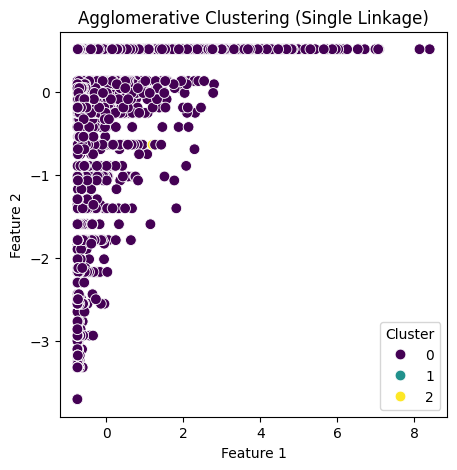

In [119]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1],
                hue=labels_agg, palette='viridis', s=60)
plt.title("Agglomerative Clustering (Single Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()